In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
# import bs4
from bs4 import BeautifulSoup
from selenium.common.exceptions import *
from selenium import webdriver

from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
import time
from selenium.webdriver.support import expected_conditions as EC

%matplotlib inline


def get_uni_information(year, unilist, page):
    url = r"https://www.topuniversities.com/university-rankings/world-university-rankings/{}".format(year)
    # Open url and get the QS Ranking html page
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
    time.sleep(2)
    driver.get(url)
    time.sleep(5)
    
    # Scrawl all the pages (max page is 40)
    for _ in range(int(page)):
        # Use BeautifulSoup to parse every page
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Find the table which contains the ranking information of every universities
        x = soup.find(name="table", attrs={"class": "dataTable no-footer"})
        # able=soup.find('div',{'id':'TableWithRules'})
        # Use for loop to catch every rows in the table, and append the rows into the list
        for tr in x.find(name="tbody"):          
            try: 
                tds = tr('td')
                if tds[0].find(name="span") is not None:
                    rank = tds[0].find(name="span").string
                else: 
                    rank = None
                if tds[1].find(name="a") is not None:
                    uni = tds[1].find(name="a").string
                else: 
                    uni = None
                if tds[2].find(attrs={"class": "td-wrap"}) is not None:
                    location = tds[2].find(attrs={"class": "td-wrap"}).string
                else: 
                    location = None
            except (RuntimeError, TypeError, NameError):
                pass
            unilist.append([rank, uni, location])
        # Click next page button
        element = driver.find_element_by_xpath('//*[@id="qs-rankings_next"]')
        driver.execute_script("arguments[0].click();", element)
        time.sleep(5)
    
    driver.quit()
    return unilist

def get_qs_ranking_dataframe(year, page):
    unilist = []
    unilist = get_uni_information(year, unilist, page)
    df = pd.DataFrame(unilist)
    df.columns = ["ranking", "uni", "location"]
    df.reset_index(drop=True)
    
    # Dataframe preprocessing
    df["ranking"] = [int(x)+1 for x in range(len(df))]
    df["uni"] = df["uni"].map(str)
    df["location"] = df["location"].map(str)
    
    return df


In [2]:
unilist = []

def get_uni_information(year, unilist, page):
    url = r"https://www.topuniversities.com/university-rankings/world-university-rankings/{}".format(year)
    # Open url and get the QS Ranking html page
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
    time.sleep(2)
    driver.get(url)
    time.sleep(5)
    
    # Scrawl all the pages (max page is 40)
    for _ in range(int(page)):
        # Use BeautifulSoup to parse every page
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Find the table which contains the ranking information of every universities
        x = soup.find(name="table", attrs={"class": "dataTable no-footer"})
        print(x.prettify())


        # x = soup.find(name="table")
        # print(x)
        # able=soup.find('div',{'id':'TableWithRules'})
        # Use for loop to catch every rows in the table, and append the rows into the list
        # for tr in x.find(name="tbody"):          
        #     try: 
        #         tds = tr('td')
        #         if tds[0].find(name="span") is not None:
        #             rank = tds[0].find(name="span").string
        #         else: 
        #             rank = None
        #         if tds[1].find(name="a") is not None:
        #             uni = tds[1].find(name="a").string
        #         else: 
        #             uni = None
        #         if tds[2].find(attrs={"class": "td-wrap"}) is not None:
        #             location = tds[2].find(attrs={"class": "td-wrap"}).string
        #         else: 
        #             location = None
        #     except (RuntimeError, TypeError, NameError):
        #         pass
        #     unilist.append([rank, uni, location])
        # Click next page button
        # element = driver.find_element_by_xpath('//*[@id="qs-rankings_next"]')
        # driver.execute_script("arguments[0].click();", element)
        time.sleep(5)
    
    driver.quit()
    print(unilist)
    return unilist


get_uni_information(2023, unilist ,1)


# def get_top_universities(url):
#     unilist = get_uni_information(url)
#     df = pd.DataFrame(unilist, columns=["Rank", "University", "Location"])
#     return df

url = "https://www.topuniversities.com/university-rankings/world-university-rankings/2023"
# top_universities = get_top_universities(url)
# print(top_universities)




====== WebDriver manager ======
Current google-chrome version is 113.0.5672
Get LATEST chromedriver version for 113.0.5672 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/113.0.5672.63/chromedriver_mac64.zip
Driver has been saved in cache [/Users/niloy/.wdm/drivers/chromedriver/mac64/113.0.5672.63]
/var/folders/9_/59tchfjn2vx4w76nvh4w62580000gn/T/ipykernel_24076/2540594791.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


<html class="js" dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head attr="https://www.topuniversities.com/">
  <script async="" src="https://sso.qs.com/config.js">
  </script>
  <script src="" type="text/javascript">
  </script>
  <script async="" src="https://ajax.googleapis.com/ajax/libs/webfont/1.6.26/webfont.js">
  </script>
  <script data-cookieconsent="ignore" data-hs-ignore="true" data-hsjs-env="prod" data-hsjs-hublet="eu1" data-hsjs-portal="25874232" data-loader="hs-scriptloader" id="cookieBanner-25874232" src="https://js-eu1.hs-banner.com/v2/25874232/banner.js" type="text/javascript">
  </script>
  <script id="hs-analytics" src="http

In [12]:
qs_2020 = get_qs_ranking_dataframe(year=2023, page=10)



====== WebDriver manager ======
Current google-chrome version is 113.0.5672
Get LATEST chromedriver version for 113.0.5672 google-chrome
Driver [/Users/niloy/.wdm/drivers/chromedriver/mac64/113.0.5672.63/chromedriver] found in cache
/var/folders/9_/59tchfjn2vx4w76nvh4w62580000gn/T/ipykernel_81887/1208143875.py:23: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


AttributeError: 'NoneType' object has no attribute 'find'

In [16]:
def get_uni_information(year, unilist, page):
    url = r"https://www.topuniversities.com/university-rankings/world-university-rankings/{}".format(year)
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
    time.sleep(2)
    driver.get(url)
    time.sleep(5)
    
    for _ in range(int(page)):
        soup = BeautifulSoup(driver.page_source, "html.parser")
        x = soup.find(name="table", attrs={"class": "dataTable no-footer"})
        if x is not None:
            for tr in x.find(name="tbody"):
                try: 
                    tds = tr('td')
                    if tds[0].find(name="span") is not None:
                        rank = tds[0].find(name="span").string
                    else: 
                        rank = None
                    if tds[1].find(name="a") is not None:
                        uni = tds[1].find(name="a").string
                    else: 
                        uni = None
                    if tds[2].find(attrs={"class": "td-wrap"}) is not None:
                        location = tds[2].find(attrs={"class": "td-wrap"}).string
                    else: 
                        location = None
                except (RuntimeError, TypeError, NameError):
                    pass
                unilist.append([rank, uni, location])
            element = driver.find_element_by_xpath('//*[@id="qs-rankings_next"]')
            driver.execute_script("arguments[0].click();", element)
            time.sleep(15)
        else:
            print("Table element not found.")
            break
    
    driver.quit()
    return unilist

# qs_2020 = get_qs_ranking_dataframe(year=2023, page=40)
unilist = []
qs_2020 = get_uni_information(2023, unilist, 1)




====== WebDriver manager ======
Current google-chrome version is 113.0.5672
Get LATEST chromedriver version for 113.0.5672 google-chrome
Driver [/Users/niloy/.wdm/drivers/chromedriver/mac64/113.0.5672.63/chromedriver] found in cache
/var/folders/9_/59tchfjn2vx4w76nvh4w62580000gn/T/ipykernel_81887/2726314879.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


Table element not found.


In [5]:
def visualise_qs_ranking(df, year, top_ranking, num):
    """
    df: dataframe
    top_ranking: top # of universities to be selected
    num: # of countries to be visaulised
    """
    plt.style.use('seaborn-paper')
    top = df.iloc[0:top_ranking]
    
    ax = (top['location'].value_counts().head(num).plot(
        kind='barh', 
        figsize=(20, 10), 
        color="tab:blue", 
        title="Number of Top {} Universities in QS Ranking {}".format(len(top['location']), str(year))))
    ax.set_xticks(np.arange(0, top['location'].value_counts()[0]+2, 1))

In [9]:
df.to_csv("qs_raking_2020.csv", index=False)

NameError: name 'df' is not defined

In [8]:
qs_2020 = get_qs_ranking_dataframe(year=2020, page=40)
qs_2019 = get_qs_ranking_dataframe(year=2019, page=40)
qs_2018 = get_qs_ranking_dataframe(year=2018, page=40)
qs_2017 = get_qs_ranking_dataframe(year=2017, page=40)
qs_2016 = get_qs_ranking_dataframe(year=2016, page=40)



====== WebDriver manager ======
Current google-chrome version is 113.0.5672
Get LATEST chromedriver version for 113.0.5672 google-chrome
Driver [/Users/niloy/.wdm/drivers/chromedriver/mac64/113.0.5672.63/chromedriver] found in cache
/var/folders/9_/59tchfjn2vx4w76nvh4w62580000gn/T/ipykernel_81887/1208143875.py:23: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


AttributeError: 'NoneType' object has no attribute 'find'

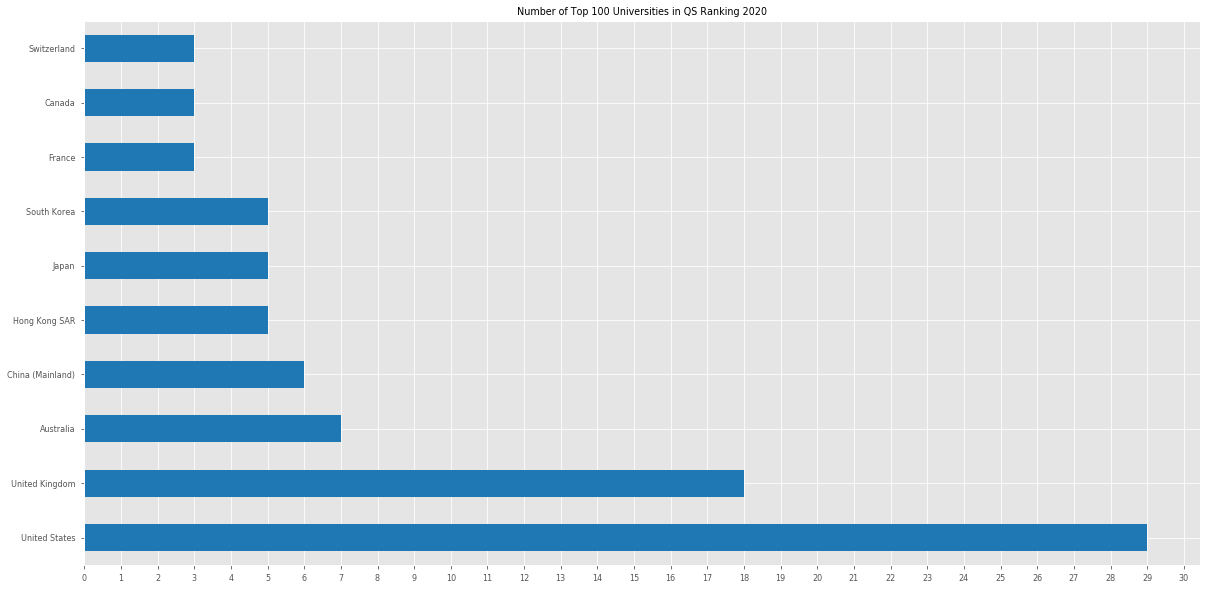

In [243]:
visualise_qs_ranking(df=qs_2020, year=2020, top_ranking=100, num=10)

In [261]:
qs_2020[(qs_2020["location"] == "United States") & (qs_2020["ranking"] <= 100)]

,ranking,uni,location
0,1,Massachusetts Institute of Technology (MIT),United States
1,2,Stanford University,United States
2,3,Harvard University,United States
4,5,California Institute of Technology (Caltech),United States
9,10,University of Chicago,United States
12,13,Princeton University,United States
13,14,Cornell University,United States
14,15,University of Pennsylvania,United States
16,17,Yale University,United States
17,18,Columbia University,United States


In [260]:
qs_2020[(qs_2020["location"] == "United Kingdom") & (qs_2020["ranking"] <= 100)]

,ranking,uni,location
3,4,University of Oxford,United Kingdom
6,7,University of Cambridge,United Kingdom
7,8,UCL,United Kingdom
8,9,Imperial College London,United Kingdom
19,20,The University of Edinburgh,United Kingdom
26,27,The University of Manchester,United Kingdom
32,33,King's College London,United Kingdom
43,44,The London School of Economics and Political S...,United Kingdom
48,49,University of Bristol,United Kingdom
61,62,The University of Warwick,United Kingdom


In [262]:
qs_2020[(qs_2020["location"] == "Japan") & (qs_2020["ranking"] <= 100)]

,ranking,uni,location
22,23,The University of Tokyo,Japan
33,34,Kyoto University,Japan
58,59,Tokyo Institute of Technology (Tokyo Tech),Japan
70,71,Osaka University,Japan
81,82,Tohoku University,Japan


In [265]:
qs_2020[(qs_2020["location"] == "Taiwan") & (qs_2020["ranking"] <= 1000)]

,ranking,uni,location
68,69,National Taiwan University (NTU),Taiwan
173,174,National Tsing Hua University,Taiwan
225,226,National Cheng Kung University (NCKU),Taiwan
227,228,National Chiao Tung University,Taiwan
250,251,National Taiwan University of Science and Tech...,Taiwan
287,288,National Yang Ming University,Taiwan
332,333,National Taiwan Normal University,Taiwan
380,381,Taipei Medical University (TMU),Taiwan
411,412,National Sun Yat-sen University,Taiwan
426,427,National Central University,Taiwan
